<a href="https://colab.research.google.com/github/20JUNE22/capstone2023/blob/main/West_rf_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First model for West of Washington

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
fd = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_wa.xlsx")

fd

,EastofWA,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,2.41,11.0,67703,534,516,2326,2,11,0,...,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,0.00,18.2,62500,435,305,1524,24,12,2,...,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,0.42,29.0,42900,2656,477,3747,48,15,2,...,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,2.59,27.0,55521,1018,330,1764,13,29,0,...,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0.00,28.0,57831,1869,287,2342,22,58,0,...,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1,1.44,29.4,52059,1441,473,1459,17,42,7,...,2.675778,3.134814,1.255273,1.633468,0.903090,3.177248,3.146748,3.281488,1.806180,2.526339
1435,1,0.08,23.4,51875,1171,431,1164,12,13,3,...,2.635484,3.028978,1.113943,1.146128,0.602060,3.285557,2.748963,2.833784,1.799341,2.340444
1436,1,2.76,31.2,36659,2520,440,1106,31,130,7,...,2.644439,3.004751,1.505150,2.117271,0.903090,3.007748,3.651859,3.707655,2.012837,2.794488
1437,1,1.73,21.2,44451,1711,364,1750,30,23,0,...,2.562293,3.218798,1.491362,1.380211,0.000000,2.690196,3.380754,3.555820,1.924279,2.652246


In [ ]:
# drop the irrelevant inputs
wa = fd.drop(fd.columns[1:15], axis=1)


wa.head()

,EastofWA,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,0,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,1,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,0,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


### Devided Washington into East and West

In [ ]:
# Two Subsets
east = wa[wa['EastofWA'] == 1] # Subset where EastofWA equals 1
west = wa[wa['EastofWA'] == 0] # Subset where EastofWA equals 0

# Drop the dimension
east = east.drop(['EastofWA'], axis=1)
west = west.drop(['EastofWA'], axis=1)

print(west.head())

    FoodDesert  log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
61           1        1.709694           1.056905                  4.697308   
62           1        0.471292           1.494155                  4.401900   
63           1        0.394452           1.294466                  4.656367   
64           1        0.113943           1.190332                  4.706650   
65           1        0.737987           1.468347                  4.641375   

    log10_TractKids  log10_TractSeniors  log10_TractWhite  log10_TractBlack  \
61         2.187521            2.227887          3.075912          2.390935   
62         3.128076            2.701568          3.517855          1.462398   
63         2.530200            2.445604          3.061075          0.845098   
64         2.793092            2.778874          3.456518          0.845098   
65         2.925312            2.725912          3.474944          1.633468   

    log10_TractAsian  log10_TractNHOPI  log10_Trac

## West of Washington

### Method selection

In [ ]:
# divided wa data into the independent and dependent variables
X = west.drop(['FoodDesert'], axis = 1) # all independent
y = west['FoodDesert']  # target

X.head()

,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
61,1.709694,1.056905,4.697308,2.187521,2.227887,3.075912,2.390935,0.954243,0.477121,2.068186,2.100371,2.201397,1.176091,1.662758
62,0.471292,1.494155,4.401900,3.128076,2.701568,3.517855,1.462398,1.732394,0.698970,2.463893,2.968483,3.022428,2.220108,2.564666
63,0.394452,1.294466,4.656367,2.530200,2.445604,3.061075,0.845098,0.903090,0.477121,2.617000,1.924279,1.863323,1.462398,2.089905
64,0.113943,1.190332,4.706650,2.793092,2.778874,3.456518,0.845098,1.431364,0.301030,2.378398,2.155336,1.903090,1.880814,2.301030
65,0.737987,1.468347,4.641375,2.925312,2.725912,3.474944,1.633468,1.724276,1.113943,2.049218,2.374748,2.227887,1.913814,2.570543


In [ ]:
y

61      1
62      1
63      1
64      1
65      1
       ..
1389    1
1390    1
1391    1
1392    1
1393    1
Name: FoodDesert, Length: 1113, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000,random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.619
Precision: 0.493
Recall: 0.440
F1 Score: 0.465

Decision Tree Results:
Accuracy: 0.614
Precision: 0.489
Recall: 0.548
F1 Score: 0.517

Random Forest Results:
Accuracy: 0.659
Precision: 0.550
Recall: 0.524
F1 Score: 0.537

XGBoost Results:
Accuracy: 0.641
Precision: 0.523
Recall: 0.536
F1 Score: 0.529

LightGBM Results:
Accuracy: 0.619
Precision: 0.494
Recall: 0.500
F1 Score: 0.497

SVM Results:
Accuracy: 0.668
Precision: 0.576
Recall: 0.452
F1 Score: 0.507

KNN Results:
Accuracy: 0.641
Precision: 0.522
Recall: 0.560
F1 Score: 0.540



> Random Forest, SVM

### Random Forest classification baseline model


In [ ]:
# Print the model's performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# from sklearn.metrics import plot_roc_curve


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the Random Forest model
rf_base= RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model to the training data
rf_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_base.predict(X_test)

# Print the model's performance metrics
print("The baseline model Results:")
print_performance_metrics(y_test, y_pred)

# from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Calculate the classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)

# # Calculate the ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred)
# print(f"ROC-AUC Score: {roc_auc:.3f}")

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# # Plot the ROC curve
# plot_roc_curve(rf, X_test, y_test) # use the input data instead of the predicted labels
# plt.show()

The baseline model Results:
Accuracy: 0.659
Precision: 0.550
Recall: 0.524
F1 Score: 0.537


Accuracy: the baseline model has an accuracy of 0.659, which means that it correctly classified 65.9% of the test set samples.

Precision:the baseline model has a precision of 0.550, which means that when it predicted a positive label, it was correct 55.0% of the time.

Recall: the baseline model has a recall of 0.524, which means that it correctly identified only 52.4% of the actual positive samples.

Based on these results, it appears that the baseline model has room for improvement, particularly in terms of recall. A low recall score means that the model is failing to identify many of the areas that are actually food deserts.

### Feature selection

#### Feature importance

In [ ]:
# view the feature scores
feature_scores = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)


# # view a bar plot
# f, ax = plt.subplots(figsize=(30, 24))
# ax = sns.barplot(x=feature_scores, y=feature_scores.index)
# ax.set_title("Visualize feature scores of the features")
# ax.set_yticklabels(feature_scores.index)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
# plt.show()

log10_TractHUNV             0.122472
log10_TractKids             0.094716
log10_TractWhite            0.087688
log10_PovertyRate           0.075275
log10_TractAsian            0.074219
log10_TractSeniors          0.065348
log10_TractBlack            0.062071
log10_MedianFamilyIncome    0.062027
log10_TractOMultir          0.061562
log10_TractSNAP             0.061531
log10_PCTGQTRS              0.060004
log10_TractHispanic         0.059133
log10_TractNHOPI            0.057877
log10_TractAIAN             0.056078
dtype: float64


In [ ]:
# # drop the least important feature from X_train and X_test
# X_train2 = X_train.drop(['log10_TractAIAN','log10_TractNHOPI','log10_TractHispanic','log10_PCTGQTRS'], axis=1)
# X_test2 = X_test.drop(['log10_TractAIAN','log10_TractNHOPI','log10_TractHispanic','log10_PCTGQTRS'], axis=1)

# # Train a new Random Forest model with the selected features
# rf2 = RandomForestClassifier(n_estimators=100, random_state=123)
# rf2.fit(X_train2, y_train)

# # Evaluate the model on the test set
# y_pred2 = rf2.predict(X_test2)
# accuracy2 = accuracy_score(y_test, y_pred2)
# print(f"Accuracy of the model2: {accuracy2:.3f}")

Accuracy of the model2: 0.682


In [ ]:
# Store the initial feature scores
feature_scores = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Initialize variables to track the best accuracy and the corresponding feature set
best_accuracy = 0
best_feature_set = []

# Create a list to store the dropped features and accuracies
dropped_features = []
accuracies = []

# Iterate over each feature to drop
for feature in feature_scores.index:
    # Create a new feature set by dropping the current feature
    selected_features = [f for f in X_train.columns if f not in [feature]]
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Train a new Random Forest model with the selected features
    rf = RandomForestClassifier(n_estimators=100, random_state=123)
    rf.fit(X_train_subset, y_train)

    # Evaluate the model on the test set
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature_set = selected_features

    # Store the dropped feature and its corresponding accuracy
    dropped_features.append(feature)
    accuracies.append(accuracy)

# Print the best accuracy and the corresponding feature set
print(f"Best accuracy: {best_accuracy:.3f}")
print("Best feature set:", best_feature_set)

# Print the dropped features
dropped_features = [col for col in X_train.columns if col not in best_feature_set]
print("Dropped features:", dropped_features)

Best accuracy: 0.691
Best feature set: ['log10_PCTGQTRS', 'log10_PovertyRate', 'log10_MedianFamilyIncome', 'log10_TractKids', 'log10_TractWhite', 'log10_TractBlack', 'log10_TractAsian', 'log10_TractNHOPI', 'log10_TractAIAN', 'log10_TractOMultir', 'log10_TractHispanic', 'log10_TractHUNV', 'log10_TractSNAP']
Dropped features: ['log10_TractSeniors']


> I dropped less important features, the model shows improvement. 0.659 -> 0.691

In [ ]:
# Create new X_train and X_test sets using the best feature set
X_train_b = X_train[best_feature_set]
X_test_b = X_test[best_feature_set]

# Train a new Random Forest model with the best feature set
rf_b = RandomForestClassifier(n_estimators=100, random_state=123)
rf_b.fit(X_train_b, y_train)

# Predict using the fitted model
y_pred = rf_b.predict(X_test_b)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the model's performance metrics
print(f"The model Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


The model Results:
Accuracy: 0.691
Precision: 0.586
Recall: 0.607
F1 Score: 0.596


####  SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=123))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)

# Create a new dataset with the selected features
X_train3 = X_train[selected_feat]
X_test3 = X_test[selected_feat]

# Train a new Random Forest model with the selected features
rf3 = RandomForestClassifier(n_estimators=100, random_state=123)
rf3.fit(X_train3, y_train)

# Evaluate the model on the test set
y_pred3 = rf3.predict(X_test3)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred3)


Index(['log10_PovertyRate', 'log10_TractKids', 'log10_TractWhite',
       'log10_TractAsian', 'log10_TractHUNV'],
      dtype='object')
Accuracy: 0.641
Precision: 0.525
Recall: 0.500
F1 Score: 0.512


> Using the selected feature does not improve the performance of the model.

#### Recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
# create a random forest classifier
rf4 = RandomForestClassifier(n_estimators=100, random_state=123)

# create the RFE model and select top 5 features
rfe = RFE(estimator=rf4, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print("Selected Features:", list(X_train.columns[rfe.support_]))

# Evaluate the model on the test set
y_pred4 = rfe.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred4)

Selected Features: ['log10_PovertyRate', 'log10_TractKids', 'log10_TractWhite', 'log10_TractAsian', 'log10_TractHUNV']
Accuracy: 0.641
Precision: 0.525
Recall: 0.500
F1 Score: 0.512


> REF does not improve the model.

### Hyperparameter tuning

#### Randomized Search Cross Validation




In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.3f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.3f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=123)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=123,
    n_jobs=-1
)

rf_cv.fit(X_train_b, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf_best = RandomForestClassifier(**rf_best_params, random_state=123)
rf_clf_best.fit(X_train_b, y_train)

print_score(rf_clf_best, X_train_b, y_train, X_test_b, y_test, train=True)
print_score(rf_clf_best, X_train_b, y_train, X_test_b, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best paramters: {'n_estimators': 481, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 0.929
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.932939    0.924282  0.929213    0.928610      0.929165
recall       0.942231    0.912371  0.929213    0.927301      0.929213
f1-score     0.937562    0.918288  0.929213    0.927925      0.929159
support    502.000000  388.000000  0.929213  890.000000    890.000000
_______________________________________________
Confusion Matrix: 
 [[473  29]
 [ 34 354]]

Test Result:
Accuracy Score: 0.655
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.718310   0.543210  0.654709    0.630760      0.652353
recall       0.733813   0.523810  0.654709    0.628811      0.654709
f1-score     0.725979   0.533333  0.654709    0.629656      0.653413
support    139.000000  84.000000  0.654709  223.000000    223.000000


#### Grid Search Cross Validation

In [ ]:
# from sklearn.model_selection import GridSearchCV

# n_estimators = [50, 100, 500, 1000]
# max_features = ['auto', 'sqrt']
# max_depth = [2, 3, 5, 7]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4, 10]
# bootstrap = [True, False]

# params_grid = {
#     'n_estimators': n_estimators,
#     'max_features': max_features,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf,
#     'bootstrap': bootstrap
# }

# rf_clf2 = RandomForestClassifier(random_state=123)

# rf_cv2 = GridSearchCV(
#     rf_clf2,
#     params_grid,
#     scoring="f1",
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )


# rf_cv2.fit(X_train2, y_train)
# best_params = rf_cv2.best_params_
# print(f"Best parameters: {best_params}")

# rf_clf_best2 = RandomForestClassifier(**best_params,random_state=123)
# rf_clf_best2.fit(X_train2, y_train)

# print_score(rf_clf_best2, X_train2, y_train, X_test2, y_test, train=True)
# print_score(rf_clf_best2, X_train2, y_train, X_test2, y_test, train=False)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Train Result:
Accuracy Score: 0.864
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.853432    0.880342  0.864045    0.866887      0.865164
recall       0.916335    0.796392  0.864045    0.856363      0.864045
f1-score     0.883766    0.836265  0.864045    0.860015      0.863058
support    502.000000  388.000000  0.864045  890.000000    890.000000
_______________________________________________
Confusion Matrix: 
 [[460  42]
 [ 79 309]]

Test Result:
Accuracy Score: 0.641
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.703448   0.525641  0.641256    0.614545      0.636472
recall       0.733813   0.488095  0.641256    0.610954      0.

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [50, 100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 7]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf2 = RandomForestClassifier(random_state=123)

rf_cv2 = GridSearchCV(
    rf_clf2,
    params_grid,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv2.fit(X_train_b, y_train)
best_params = rf_cv2.best_params_
print(f"Best parameters: {best_params}")

rf_clf_best2 = RandomForestClassifier(**best_params,random_state=123)
rf_clf_best2.fit(X_train_b, y_train)

print_score(rf_clf_best2, X_train_b, y_train, X_test_b, y_test, train=True)
print_score(rf_clf_best2, X_train_b, y_train, X_test_b, y_test, train=False)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 0.880
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.871940    0.891365  0.879775    0.881652      0.880408
recall       0.922311    0.824742  0.879775    0.873527      0.879775
f1-score     0.896418    0.856760  0.879775    0.876589      0.879129
support    502.000000  388.000000  0.879775  890.000000    890.000000
_______________________________________________
Confusion Matrix: 
 [[463  39]
 [ 68 320]]

Test Result:
Accuracy Score: 0.664
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.725352   0.555556  0.663677    0.640454      0.661393
recall       0.741007   0.535714  0.663677    0.638361      0.663677
f1-score     0.733096   0.545455  0.663677    0.639275      0.662415
support    139.000000  84.000000  0.663677  223.000000    223.000000


### Ensembling

#### Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy import stats


# Initialize a list to store the random forest models
models = []

# Define the hyperparameters for the random forest model
rf_params = {'n_estimators': 100, 'max_depth': 5}

# Create 10 random forest models with different subsets of the training data
for i in range(10):
    # Create a bagging classifier with the random forest model as the base estimator
    bagging = BaggingClassifier(base_estimator=RandomForestClassifier(**rf_params),
                                n_estimators=10, random_state=i)

    # Fit the bagging classifier to the training data
    bagging.fit(X_train_b, y_train)

    # Add the trained model to the list
    models.append(bagging)

# Use the ensemble of models to make predictions on the test data
y_pred_ensemble = []
for model in models:
    y_pred_ensemble.append(model.predict(X_test_b))

# Take the mode of the predictions to get the final prediction
y_pred_ensemble = np.array(y_pred_ensemble)
y_pred_mode = stats.mode(y_pred_ensemble)[0].ravel()

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred_mode)
print(f"Ensemble accuracy: {accuracy:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Ensemble accuracy: 0.655


<ipython-input-29-22783bef7712>:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_mode = stats.mode(y_pred_ensemble)[0].ravel()


#### Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define the base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=False)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    voting='soft',  # use soft voting to take into account the predicted probabilities
)

# Fit the ensemble model
ensemble_model.fit(X_train_b, y_train)

# Make predictions on the test data
y_pred = ensemble_model.predict(X_test_b)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble accuracy: {accuracy:.3f}")

Ensemble accuracy: 0.659


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the individual classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators = 1000, min_samples_split=10, min_samples_leaf= 2, max_features='auto', max_depth=7, bootstrap=True, random_state=123)
lgbm = LGBMClassifier(random_state=123)
xgb = XGBClassifier(random_state=123)
lr = LogisticRegression(max_iter=1000, random_state=123)
svc = SVC(random_state=123)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('lgbm', lgbm), ('xgb', xgb), ('lr', lr), ('svc', svc)],
    voting='hard'
)

# Train the voting classifier
voting_clf.fit(X_train_b, y_train)

# Evaluate the voting classifier
y_pred = voting_clf.predict(X_test_b)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy of the voting classifier: {:.3f}".format(accuracy))
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of the voting classifier: 0.659
Precision: 0.554
Recall: 0.488
F1 Score: 0.519



### Validation

In [ ]:
# evaluating the performance of the baseline model on both training and testing datasets
print_score(rf_b, X_train_b, y_train, X_test_b, y_test, train=True)
print_score(rf_b, X_train_b, y_train, X_test_b, y_test, train=False)

Train Result:
Accuracy Score: 1.000
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    502.0  388.0       1.0      890.0         890.0
_______________________________________________
Confusion Matrix: 
 [[502   0]
 [  0 388]]

Test Result:
Accuracy Score: 0.691
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.757353   0.586207  0.690583    0.671780      0.692885
recall       0.741007   0.607143  0.690583    0.674075      0.690583
f1-score     0.749091   0.596491  0.690583    0.672791      0.691609
support    139.000000  84.000000  0.690583  223.000000    223.000000
_______________________________________________
Confusi

> The rf_b is showing overfitting. Therefore, the final model is rf_clf_best2.


Accuracy: 0.664
Precision: 0.556
Recall: 0.536
F1 Score: 0.545




* The accuracy score is 0.664, which means that the model classified 66.4% of the instances correctly.
* The precision for class 1 is 0.556, which means that of all the instances predicted as class 1, 55.6% are actually class 1.
* The recall for class 1 is 0.536, which means that of all the instances that are actually class 1, the model correctly identified 53.1% of them.
* The F1-score is 0.545 which is better than the baseline model 0.520.
* Best paramters: 'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000

In [ ]:
# Save the final model to a file
from joblib import dump

dump(rf_clf_best2, 'west_rf.pkl')

['west_rf.pkl']

### Visualization

In [ ]:
# Load the saved model from a file
from joblib import load
wrf= load('west_rf.pkl')

Accuracy: 0.664
Precision: 0.556
Recall: 0.536
F1 Score: 0.545



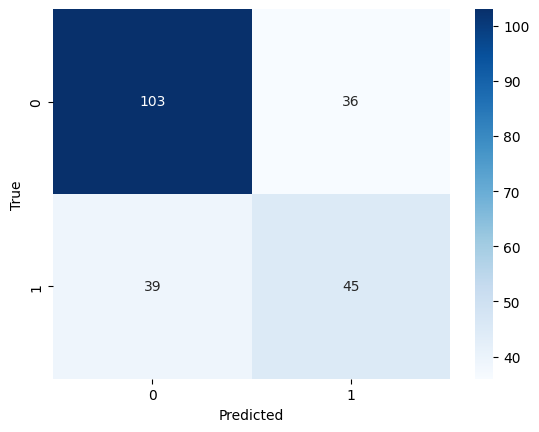

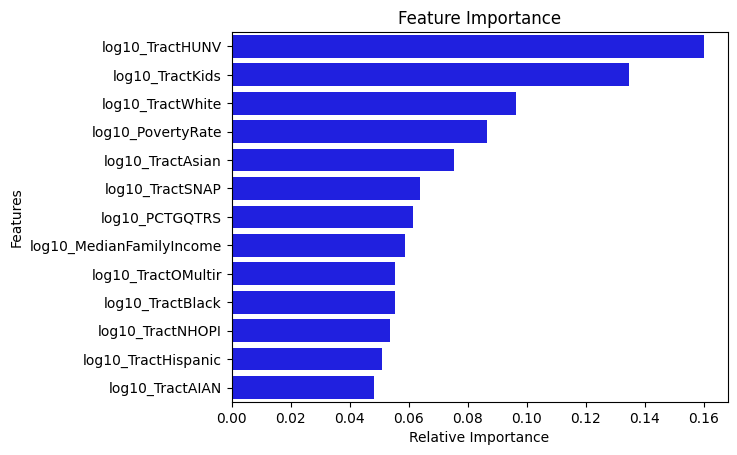

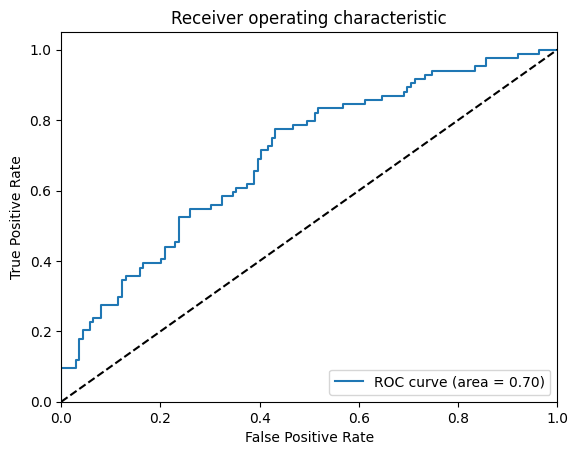

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Evaluate the model's performance using common metrics
y_pred = wrf.predict(X_test_b)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the model's performance metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print()


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance plot
importances = wrf.feature_importances_
std = np.std([tree.feature_importances_ for tree in wrf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

sns.barplot(x=importances[indices], y=X_train_b.columns[indices], color="b")
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# ROC curve
y_pred_proba = wrf.predict_proba(X_test_b)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


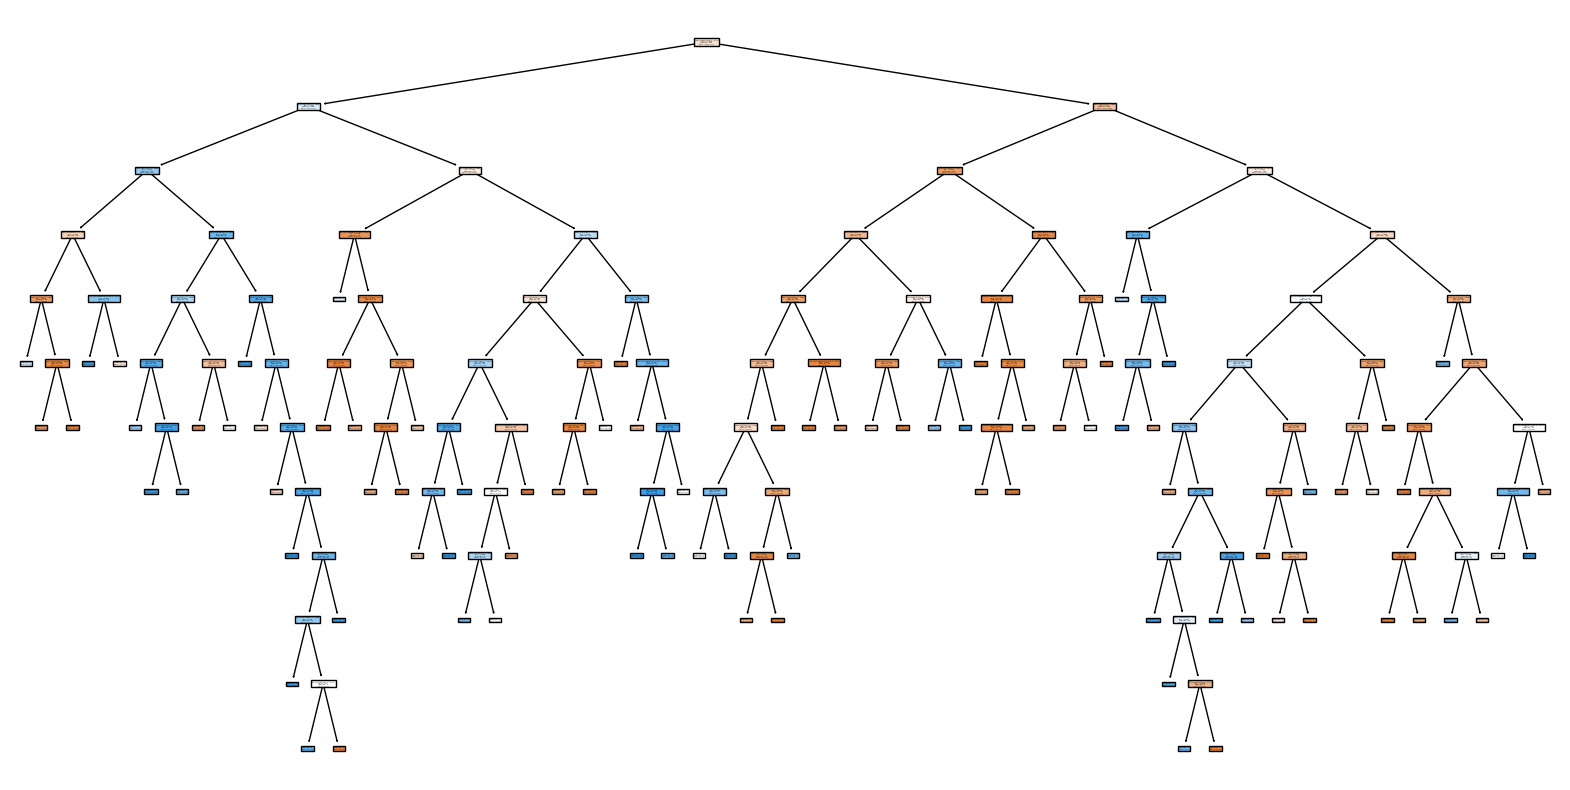

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select the first tree in the forest
tree = wrf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train2.columns)
plt.show()